# <font color = "purple">  Evaluate Hyperparameter Tuning Results</font>

Simple wide residual network has 16 hidden layers, and it is defined as WRN-N-k
<li> k is the width factor </li>
<li> N is the number of residual blocks in wide residual network </li>
<li> to convert to residual network to wide, k should be selected greater than 1. </li>

### <font color="blue">Python libraries</font>

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 12})

In [2]:
folder ="/Users/sefika/adversarial_examples_parseval_net/src/data/GridCV/"
pds = []
for file in os.listdir(folder):
    if file !=".DS_Store":
        results = pd.DataFrame()
        results = pd.read_csv(folder+file, index_col=False, delimiter=";")
        pds.append(results)

In [3]:
data = pd.concat(pds,ignore_index=True)

In [6]:
data.head(10)

Unnamed: 0  momentum  learning rate  batch size     loss1      acc1  \
0           0       0.9            0.1        64.0  1.473938  0.636998   
1           1       0.9            0.1        64.0  0.932459  0.696335   
2           2       0.9            0.1        64.0  0.948163  0.705061   
3           3       0.9            0.1        64.0  0.985574  0.720768   
4           4       0.9            0.1       128.0  1.121000  0.591623   
5           5       0.9            0.1       128.0  0.991778  0.713787   
6           0       0.9            0.1       128.0  1.038289  0.705061   
7           1       0.9            0.1       128.0  1.436633  0.668412   
8           2       0.9            0.1       128.0  1.255427  0.677138   
9           3       0.9            0.1       128.0  1.023322  0.715532   

      loss2      acc2     loss3      acc3  ...      acc9  epoch_stopped  \
0  0.979015  0.746946  0.972218  0.731239  ...  0.727749          150.0   
1  0.812001  0.739965  0.854554  0.719023  ...  0.673647           50.0   
2  0.809605  0.780105  0.897509  0.755672  ...  0.743455          100.0   
3  0.987147  0.729494  0.997408  0.741710  ...  0.746946          150.0   
4  1.309793  0.572426  1.362746  0.504363  ...  0.684119           50.0   
5  1.418078  0.530541  1.014928  0.699825  ...  0.666667          100.0   
6  1.169747  0.642234  1.234949  0.631763  ...  0.705061          150.0   
7  1.433625  0.677138  1.468548  0.656195  ...  0.558464           50.0   
8  1.165012  0.713787  1.186796  0.685864  ...  0.678883          100.0   
9  1.208556  0.663176  0.941410  0.727749  ...  0.663176          150.0   

     loss10     loss4     loss5     loss6     loss7     loss8     loss9  \
0  0.932918  1.041325  0.939665  1.056463  1.180550  1.017923  1.029265   
1  0.865943  0.820558  0.900513  0.909224  0.896433  0.823886  0.927958   
2  0.855287  0.824249  0.923284  0.841711  0.981435  1.083057  0.832216   
3  0.929708  0.902130  0.901395  0.871781  1.064466  1.005045  1.027067   
4  1.087746  1.015318  1.171576  1.052059  1.672253  1.046905  1.032066   
5  1.315197  0.987770  1.113548  1.314808  1.541745  1.026822  1.134454   
6  1.333741  1.103243  1.905991  1.375389  1.381897  1.238900  1.034917   
7  1.538438  1.406662  1.422832  1.493037  1.575557  1.586586  1.737639   
8  1.237072  1.647636  1.166318  1.915378  1.282239  1.165892  1.212269   
9  0.987322  0.987239  1.000375  1.014935  1.270735  0.989209  1.209883   

   reg_penalty  
0       0.0010  
1       0.0001  
2       0.0001  
3       0.0001  
4       0.0100  
5       0.0100  
6       0.0100  
7       0.0010  
8       0.0010  
9       0.0010  

[10 rows x 27 columns]

## <font color="green"> Simple Residual Network</font>
Simple Residual Netwok, witdh factor (k) = 1

In [10]:
del data[data.columns[0]]


In [11]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   momentum       40 non-null     float64
 1   learning rate  40 non-null     float64
 2   batch size     40 non-null     float64
 3   loss1          40 non-null     float64
 4   acc1           40 non-null     float64
 5   loss2          40 non-null     float64
 6   acc2           40 non-null     float64
 7   loss3          40 non-null     float64
 8   acc3           40 non-null     float64
 9   widing factor  40 non-null     float64
 10  acc10          40 non-null     float64
 11  acc4           40 non-null     float64
 12  acc5           40 non-null     float64
 13  acc6           40 non-null     float64
 14  acc7           40 non-null     float64
 15  acc8           40 non-null     float64
 16  acc9           40 non-null     float64
 17  epoch_stopped  40 non-null     float64
 18  loss10      

In [12]:
data.head(5)

momentum  learning rate  batch size     loss1      acc1     loss2  \
0       0.9            0.1        64.0  1.473938  0.636998  0.979015   
1       0.9            0.1        64.0  0.932459  0.696335  0.812001   
2       0.9            0.1        64.0  0.948163  0.705061  0.809605   
3       0.9            0.1        64.0  0.985574  0.720768  0.987147   
4       0.9            0.1       128.0  1.121000  0.591623  1.309793   

       acc2     loss3      acc3  widing factor  ...      acc9  epoch_stopped  \
0  0.746946  0.972218  0.731239            1.0  ...  0.727749          150.0   
1  0.739965  0.854554  0.719023            1.0  ...  0.673647           50.0   
2  0.780105  0.897509  0.755672            1.0  ...  0.743455          100.0   
3  0.729494  0.997408  0.741710            1.0  ...  0.746946          150.0   
4  0.572426  1.362746  0.504363            1.0  ...  0.684119           50.0   

     loss10     loss4     loss5     loss6     loss7     loss8     loss9  \
0  0.932918  1.041325  0.939665  1.056463  1.180550  1.017923  1.029265   
1  0.865943  0.820558  0.900513  0.909224  0.896433  0.823886  0.927958   
2  0.855287  0.824249  0.923284  0.841711  0.981435  1.083057  0.832216   
3  0.929708  0.902130  0.901395  0.871781  1.064466  1.005045  1.027067   
4  1.087746  1.015318  1.171576  1.052059  1.672253  1.046905  1.032066   

   reg_penalty  
0       0.0010  
1       0.0001  
2       0.0001  
3       0.0001  
4       0.0100  

[5 rows x 26 columns]

## <font color ="green"> Evaluation of the hyperparameter tuning results</font>

In [13]:
data["loss_mean"] = (data["loss1"]+data["loss2"]+data["loss3"]+data["loss4"]+data["loss5"]+data["loss6"]+data["loss7"]+data["loss8"]+data["loss9"]+data["loss10"])/10

In [14]:
data["acc_mean"] = (data["acc1"]+data["acc2"]+data["acc3"]+data["acc4"]+data["acc5"]+data["acc6"]+data["acc7"]+data["acc8"]+data["acc9"]+data["acc10"])/10

In [15]:
data['epoch'] = data['epoch_stopped']
data['weight_decay'] = data['reg_penalty']

In [16]:
column_list = ["momentum", "learning rate", "epoch","batch size","weight_decay","loss_mean", "acc_mean"]

In [17]:
print(data.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  momentum &  learning rate &  epoch &  batch size &  weight\_decay &  loss\_mean &  acc\_mean \\
\midrule
1  &       0.9 &           0.10 &   50.0 &        64.0 &        0.0001 &   0.874353 &  0.707679 \\
2  &       0.9 &           0.10 &  100.0 &        64.0 &        0.0001 &   0.899651 &  0.732461 \\
27 &       0.9 &           0.01 &  150.0 &        64.0 &        0.0001 &   0.937435 &  0.682373 \\
\bottomrule
\end{tabular}



In [19]:
data["loss_na"] = data.loc[:,["loss1","loss2", "loss3", "loss4","loss5","loss6", "loss7","loss8", "loss9","loss10"]].isnull().sum(1)

In [20]:
data.head(3)

momentum  learning rate  batch size     loss1      acc1     loss2  \
0       0.9            0.1        64.0  1.473938  0.636998  0.979015   
1       0.9            0.1        64.0  0.932459  0.696335  0.812001   
2       0.9            0.1        64.0  0.948163  0.705061  0.809605   

       acc2     loss3      acc3  widing factor  ...     loss6     loss7  \
0  0.746946  0.972218  0.731239            1.0  ...  1.056463  1.180550   
1  0.739965  0.854554  0.719023            1.0  ...  0.909224  0.896433   
2  0.780105  0.897509  0.755672            1.0  ...  0.841711  0.981435   

      loss8     loss9  reg_penalty  loss_mean  acc_mean  epoch  weight_decay  \
0  1.017923  1.029265       0.0010   1.062328  0.724782  150.0        0.0010   
1  0.823886  0.927958       0.0001   0.874353  0.707679   50.0        0.0001   
2  1.083057  0.832216       0.0001   0.899651  0.732461  100.0        0.0001   

   loss_na  
0        0  
1        0  
2        0  

[3 rows x 31 columns]

## Visualization

In [17]:
loss = [data["loss1"][1],data["loss2"][1],data["loss3"][1],data["loss4"][1],data["loss5"][1],data["loss6"][1],
        data["loss7"][1],data["loss8"][1],data["loss9"][1],data["loss10"][1],data["loss1"][2],
        data["loss2"][2],data["loss3"][2],data["loss4"][2],data["loss5"][2],data["loss6"][2],
        data["loss7"][2],data["loss8"][2],data["loss9"][2],data["loss10"][2],
        data["loss1"][26],data["loss2"][26],data["loss3"][26],data["loss4"][26],
        data["loss5"][26],data["loss6"][26],data["loss7"][26],data["loss8"][26],
        data["loss9"][26],data["loss10"][26]]

In [18]:
boxplot_data = {'NeuralNetwork': ["Model1", "Model1", "Model1","Model1", "Model1", "Model1","Model1", "Model1", "Model1","Model1",
                                   "Model2", "Model2", "Model2","Model2", "Model2", "Model2","Model2", "Model2", "Model2","Model2",
                                   "Model3", "Model3", "Model3","Model3", "Model3", "Model3","Model3", "Model3", "Model3","Model3"],
                'Loss': loss}
boxplot_df = pd.DataFrame(data=boxplot_data)

## <font color = "blue"> BoxPlot</font>

Text(0.5, 1.0, 'Boxplot of the Best 3 Models')

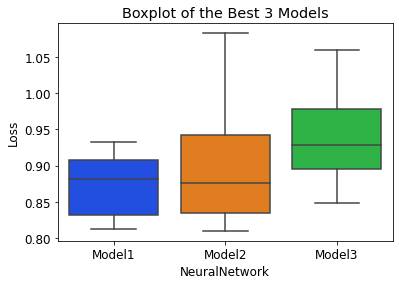

In [21]:
sns.boxplot(x=boxplot_df["NeuralNetwork"], y=boxplot_df["Loss"], palette="bright")
plt.title("Boxplot of the Best 3 Models")

In [24]:
best_model=pd.DataFrame()
best_model =data.sort_values(axis=0, by="loss_mean", ascending=True)[column_list][:3]

<font color="green">Consequently, it can be seen that increasing the widing factor results in high loss values and loss mean on the results of hyperparameter tuning.
   
   However, we will train the simple residual network and simple wide residual networks on the rest of the project.</font>

## <font color= "Purple">Visualize the parameters of the Best Model </font>

In [25]:
best_model

momentum  learning rate  epoch  batch size  weight_decay  loss_mean  \
1        0.9           0.10   50.0        64.0        0.0001   0.874353   
2        0.9           0.10  100.0        64.0        0.0001   0.899651   
26       0.9           0.01  150.0        64.0        0.0001   0.937435   

    acc_mean  
1   0.707679  
2   0.732461  
26  0.682373

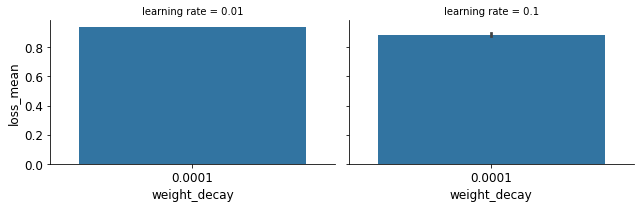

In [26]:
g = sns.FacetGrid(best_model, col="learning rate", sharey=True, aspect=1.5, margin_titles=True)
g.map(sns.barplot, "learning rate", "loss_mean", order = [0.01, 0.1])
plt.rcParams.update({'font.size': 10})
g.map(sns.barplot, "weight_decay", "loss_mean")
plt.show()

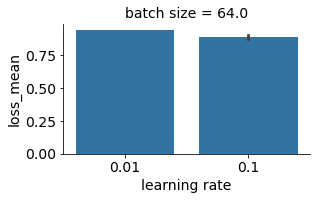

In [27]:
plt.rcParams.update({'font.size': 14})
g = sns.FacetGrid(best_model, col = "batch size", sharey=True, aspect=1.5, margin_titles=True)
g.map(sns.barplot, "learning rate", "loss_mean", order = [0.01, 0.1])
plt.rcParams.update({'font.size': 14})
plt.show()

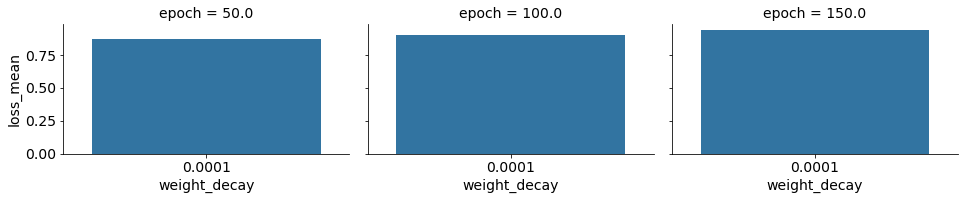

In [28]:
g = sns.FacetGrid(best_model, col="epoch", sharey=True, aspect=1.5, margin_titles=True)
g.map(sns.barplot, "weight_decay", "loss_mean")
plt.show()

## <font color="green">Increase the width factor to find the better model</font>
Simple Wide Residual Netwok, witdh factor (k) = 2

In [21]:
data_wide_basic  = pd.read_csv("/Users/sefika/adversarial_examples_parseval_net/src/data/GridCV/grid_16_2.csv", sep=";")

In [23]:
del data_wide_basic[data_wide_basic.columns[0]]

In [24]:
data_wide_basic.head(1)

momentum  learning rate  batch size     loss1      acc1     loss2  \
0       0.9            0.1        64.0  1.211841  0.668412  1.187398   

       acc2     loss3      acc3  widing factor  ...      acc9  epoch_stopped  \
0  0.696335  1.048499  0.719023            2.0  ...  0.680628           50.0   

    loss10     loss4    loss5    loss6     loss7     loss8     loss9  \
0  1.08041  1.004501  1.22866  0.99855  1.089862  0.941314  1.094591   

   reg_penalty  
0       0.0001  

[1 rows x 26 columns]

In [25]:
data_wide_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   momentum       1 non-null      float64
 1   learning rate  1 non-null      float64
 2   batch size     1 non-null      float64
 3   loss1          1 non-null      float64
 4   acc1           1 non-null      float64
 5   loss2          1 non-null      float64
 6   acc2           1 non-null      float64
 7   loss3          1 non-null      float64
 8   acc3           1 non-null      float64
 9   widing factor  1 non-null      float64
 10  acc10          1 non-null      float64
 11  acc4           1 non-null      float64
 12  acc5           1 non-null      float64
 13  acc6           1 non-null      float64
 14  acc7           1 non-null      float64
 15  acc8           1 non-null      float64
 16  acc9           1 non-null      float64
 17  epoch_stopped  1 non-null      float64
 18  loss10        

In [26]:
data_wide_basic["loss_mean"] = (data_wide_basic["loss1"]+data_wide_basic["loss2"]+data_wide_basic["loss3"]+data_wide_basic["loss4"]+data_wide_basic["loss5"]+data_wide_basic["loss6"]+data_wide_basic["loss7"]+data_wide_basic["loss8"]+data_wide_basic["loss9"]+data_wide_basic["loss10"])/10

In [27]:
data_wide_basic["acc_mean"] = (data_wide_basic["acc1"]+data_wide_basic["acc2"]+data_wide_basic["acc3"]+data_wide_basic["acc4"]+data_wide_basic["acc5"]+data_wide_basic["acc6"]+data_wide_basic["acc7"]+data_wide_basic["acc8"]+data_wide_basic["acc9"]+data_wide_basic["acc10"])/10

In [29]:
data_wide_basic['epoch'] = data_wide_basic['epoch_stopped']
data_wide_basic['weight_decay'] = data_wide_basic['reg_penalty']

In [30]:
data_wide_basic.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3)

momentum  learning rate  epoch  batch size  weight_decay  loss_mean  \
0       0.9            0.1   50.0        64.0        0.0001   1.088562   

   acc_mean  
0  0.706981

## <font color="green"> Wide Residual Network</font>
Wide Residual Netwok, witdh factor (k) = 4

In [31]:
data_wide_k_4  = pd.read_csv("/Users/sefika/adversarial_examples_parseval_net/src/data/GridCV/grid_16_4.csv", sep=";")

In [32]:
data_wide_k_4.head(5)

Unnamed: 0  momentum  learning rate  batch size     loss1      acc1  \
0           0       0.9            0.1        64.0  1.273512  0.726003   

      loss2      acc2     loss3      acc3  ...      acc9  epoch_stopped  \
0  1.209218  0.750436  1.570295  0.682373  ...  0.764398           50.0   

     loss10     loss4     loss5     loss6     loss7     loss8     loss9  \
0  1.209179  1.446582  1.182434  1.072532  1.243928  1.248049  1.083073   

   reg_penalty  
0       0.0001  

[1 rows x 27 columns]

In [33]:
del data_wide_k_4[data_wide_k_4.columns[0]]


In [34]:
data_wide_k_4.head(1)

momentum  learning rate  batch size     loss1      acc1     loss2  \
0       0.9            0.1        64.0  1.273512  0.726003  1.209218   

       acc2     loss3      acc3  widing factor  ...      acc9  epoch_stopped  \
0  0.750436  1.570295  0.682373            4.0  ...  0.764398           50.0   

     loss10     loss4     loss5     loss6     loss7     loss8     loss9  \
0  1.209179  1.446582  1.182434  1.072532  1.243928  1.248049  1.083073   

   reg_penalty  
0       0.0001  

[1 rows x 26 columns]

In [35]:
data_wide_k_4["acc_mean"] = (data_wide_k_4["acc1"]+data_wide_k_4["acc2"]+data_wide_k_4["acc3"]+data_wide_k_4["acc4"]+data_wide_k_4["acc5"]+data_wide_k_4["acc6"]+data_wide_k_4["acc7"]+data_wide_k_4["acc8"]+data_wide_k_4["acc9"]+data_wide_k_4["acc10"])/10
data_wide_k_4["loss_mean"] = (data_wide_k_4["loss1"]+data_wide_k_4["loss2"]+data_wide_k_4["loss3"]+data_wide_k_4["loss4"]+data_wide_k_4["loss5"]+data_wide_k_4["loss6"]+data_wide_k_4["loss7"]+data_wide_k_4["loss8"]+data_wide_k_4["loss9"]+data_wide_k_4["loss10"])/10

data_wide_k_4['epoch'] = data_wide_k_4['epoch_stopped']
data_wide_k_4['weight_decay'] = data_wide_k_4['reg_penalty']
data_wide_k_4.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3)

momentum  learning rate  epoch  batch size  weight_decay  loss_mean  \
0       0.9            0.1   50.0        64.0        0.0001    1.25388   

   acc_mean  
0  0.734729

## <font color="purple"> Visualization </font>

In [47]:
column_list = ["loss_mean", "acc_mean", "widing factor"]

In [42]:
data_k_4 = data_wide_k_4.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(1)
data_k_2 = data_wide_basic.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(1)
data_k_1 = data.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(1)

In [43]:
best_model=pd.DataFrame()
best_model = pd.concat([data_k_1, data_k_2, data_k_4], ignore_index=True)

## <font color="blue"><b>Conclusion:</b></font>

In [48]:
print(best_model.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  loss\_mean &  acc\_mean &  widing factor \\
\midrule
0 &   0.874353 &  0.707679 &            1.0 \\
1 &   1.088562 &  0.706981 &            2.0 \\
2 &   1.253880 &  0.734729 &            4.0 \\
\bottomrule
\end{tabular}



<font color="purple">
    <b>
        <center> Sefika Efeoglu</center>
        <center>Universiteat Potsdam</center>
    </b>
</font>